## Capstone Project: Analysis on Electricity Market in Singapore
- Jonathan Lee, General Assembly Data Analytics Bootcamp, July 2025

### The aim of this project is to look into 3 main areas of the Electricity Market:
1. Electricity Consumption
2. Peak System Demand vs Installed Capacity
3. Household Electricity Market - specifically predicting Low Tension Tariff - Domestic

Note: Please Refer to the PowerBI dashboard for more data insights across several metrics

In [2]:
#Add in libraries that I think will be needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Monthly Electricity Generation Data - Source: EMA

In [3]:
monthly_generation = pd.read_csv('./datasets/ElectricityGenerationMonthly.csv')

In [4]:
#preview the data
monthly_generation.head()

,DataSeries,2025Mar,2025Feb,2025Jan,2024Dec,2024Nov,2024Oct,2024Sep,2024Aug,2024Jul,...,1975Oct,1975Sep,1975Aug,1975Jul,1975Jun,1975May,1975Apr,1975Mar,1975Feb,1975Jan
0,Electricity Generation,4991.2,4460.5,4833.5,4937.6,4861.4,5095.2,4950.1,5131.9,5189.6,...,368.5,359.1,363,359.7,343.3,351.4,348.6,342.8,289.6,341.8


In [5]:
#transpose the data for better handling
monthly_generation = monthly_generation.T.reset_index()

In [6]:
#rename column
monthly_generation.columns = monthly_generation.iloc[0]
monthly_generation = monthly_generation[1:].reset_index(drop=True)

In [7]:
monthly_generation.head()

,DataSeries,Electricity Generation
0,2025Mar,4991.2
1,2025Feb,4460.5
2,2025Jan,4833.5
3,2024Dec,4937.6
4,2024Nov,4861.4


In [9]:
#rename columns
monthly_generation.rename(columns={"DataSeries" : "date", "Electricity Generation" : "electricity_generation_GWh"}, inplace = True)
#then convert date column to datetime format
monthly_generation["date"] = pd.to_datetime(monthly_generation["date"], format = '%Y%b')

In [103]:
#prepped monthly electricity generation data
monthly_generation

,date,electricity_generation_GWh
0,2025-03-01,4991.2
1,2025-02-01,4460.5
2,2025-01-01,4833.5
3,2024-12-01,4937.6
4,2024-11-01,4861.4
...,...,...
598,1975-05-01,351.4
599,1975-04-01,348.6
600,1975-03-01,342.8
601,1975-02-01,289.6


In [ ]:
#export to csv
monthly_generation.to_csv('monthly_generation.csv')

In [10]:
#read annual consumption data
electricity_annual = pd.read_csv('./datasets/ElectricityGenerationAndConsumptionAnnual.csv')

In [ ]:
#go through same steps as for the monthly data
electricity_annual = electricity_annual.T

In [13]:
electricity_annual.columns = electricity_annual.iloc[0]
electricity_annual = electricity_annual[1:]

In [14]:
electricity_annual["date"] = electricity_annual.index
electricity_annual = electricity_annual.reset_index(drop=True)

In [15]:
electricity_annual.head()

DataSeries,Electricity Generation,Electricity Consumption,Industrial-Related,Manufacturing,Construction,Utilities,Other Industrial-Related,Commerce And Service-Related,Wholesale And Retail Trade,Accommodation And Food Services,Information And Communications,Financial And Insurance Activities,Real Estate Activities,"Professional, Scientific & Technical, Administration & Support Activities",Other Commerce And Service-Related,Transport-Related,Households,Others,date
0,59616.1,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,2024
1,57384.2,55386.9,22103.0,20171.2,421.6,1451.2,59.0,22092.7,2221.9,1587.4,5408.5,2376.0,4728.5,974.3,4796.1,3030.2,8002.9,158.1,2023
2,57113.7,54884.9,22693.9,20682.1,464.5,1490.7,56.6,21187.3,2253.5,1441.5,4852.4,2341.7,4714.6,949.4,4634.2,2899.7,7911.0,193.0,2022
3,55788.3,53483.3,22293.1,20284.8,472.0,1482.1,54.2,19837.1,2226.8,1328.1,4029.0,2271.9,4616.3,823.1,4541.9,2844.7,8277.7,230.8,2021
4,53071.6,50779.5,20978.9,19121.3,387.0,1418.7,51.9,18517.6,2180.9,1289.1,3086.2,2152.4,4546.7,798.2,4464.2,2809.2,8244.5,229.3,2020


In [16]:
#filtering away the columns with null values
electricity_annual[electricity_annual["Electricity Consumption"] != "na"]

DataSeries,Electricity Generation,Electricity Consumption,Industrial-Related,Manufacturing,Construction,Utilities,Other Industrial-Related,Commerce And Service-Related,Wholesale And Retail Trade,Accommodation And Food Services,Information And Communications,Financial And Insurance Activities,Real Estate Activities,"Professional, Scientific & Technical, Administration & Support Activities",Other Commerce And Service-Related,Transport-Related,Households,Others,date
1,57384.2,55386.9,22103.0,20171.2,421.6,1451.2,59.0,22092.7,2221.9,1587.4,5408.5,2376.0,4728.5,974.3,4796.1,3030.2,8002.9,158.1,2023
2,57113.7,54884.9,22693.9,20682.1,464.5,1490.7,56.6,21187.3,2253.5,1441.5,4852.4,2341.7,4714.6,949.4,4634.2,2899.7,7911.0,193.0,2022
3,55788.3,53483.3,22293.1,20284.8,472.0,1482.1,54.2,19837.1,2226.8,1328.1,4029.0,2271.9,4616.3,823.1,4541.9,2844.7,8277.7,230.8,2021
4,53071.6,50779.5,20978.9,19121.3,387.0,1418.7,51.9,18517.6,2180.9,1289.1,3086.2,2152.4,4546.7,798.2,4464.2,2809.2,8244.5,229.3,2020
5,54142.3,51730.1,21463.9,19439.4,397.1,1574.5,53.0,19318.9,2265.4,1523.3,2494.8,2380.7,4864.7,805.3,4984.6,3019.3,7681.3,246.8,2019
6,52904.8,50461.0,21441.8,19441.0,431.5,1522.0,47.3,18582.3,2316.5,1465.2,2229.9,2321.1,4672.4,720.2,4857.1,2947.0,7231.5,258.4,2018
7,52225.8,49638.0,21240.6,19306.8,485.5,1402.1,46.2,18059.9,2282.5,1406.2,1862.5,2408.4,4668.7,688.4,4743.2,2771.1,7289.9,276.5,2017
8,51586.6,48623.0,20418.5,18365.3,554.2,1453.3,45.7,17699.5,2073.3,1453.1,1851.2,2361.1,4496.4,681.3,4783.2,2639.0,7585.8,280.0,2016
9,50271.6,47513.9,20087.8,18274.8,533.8,1237.2,42.0,17481.2,2107.4,1350.2,1430.1,2718.1,4454.6,710.3,4710.5,2444.8,7220.9,279.1,2015
10,49309.7,46403.0,19753.1,17986.4,529.4,1198.2,39.1,17046.7,2020.5,1332.3,1298.2,2574.1,4485.7,677.4,4658.6,2441.0,6924.4,237.7,2014


In [ ]:
#saving to csv as annual electricity consumption data
electricity_annual[electricity_annual["Electricity Consumption"] != "na"].to_csv('electricity_annual.csv')

In [ ]:
#creating a dataset with date, annual generation and consumption as columns
electricity_annual_overall = electricity_annual[["date", "Electricity Generation", "Electricity Consumption"]]
electricity_annual_overall.head()

DataSeries,date,Electricity Generation,Electricity Consumption
0,2024,59616.1,na
1,2023,57384.2,55386.9
2,2022,57113.7,54884.9
3,2021,55788.3,53483.3
4,2020,53071.6,50779.5


In [20]:
#filter away null column first
electricity_annual_calc = electricity_annual_overall[electricity_annual_overall["Electricity Consumption"] != "na"]

In [21]:
#create new feature of consumption to generation ratio, to see if there is any trends in how much of generated electricity is consumed
electricity_annual_calc["cons_gen_ratio"] = electricity_annual_calc["Electricity Consumption"]/electricity_annual_calc["Electricity Generation"]

C:\Users\User\AppData\Local\Temp\ipykernel_1052\4170353387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_annual_calc["cons_gen_ratio"] = electricity_annual_calc["Electricity Consumption"]/electricity_annual_calc["Electricity Generation"]


In [22]:
#convert to datetime
electricity_annual_calc["date"] = pd.to_datetime(electricity_annual_calc["date"], format='%Y')

C:\Users\User\AppData\Local\Temp\ipykernel_1052\2696673979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_annual_calc["date"] = pd.to_datetime(electricity_annual_calc["date"], format='%Y')


<Axes: xlabel='date'>

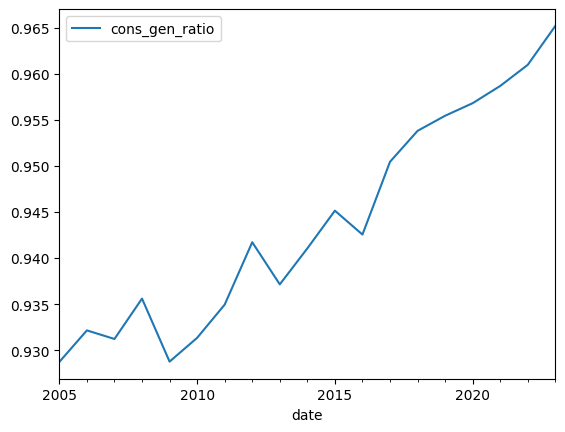

In [ ]:
#plot
electricity_annual_calc.plot(x = "date", y = "cons_gen_ratio")

## It seems that the electricity to generation ratio follows an increasing trend. This is great as it means that less electricity generated is being wasted 
#### Let's look at some consumption trends instead.

<Axes: xlabel='date'>

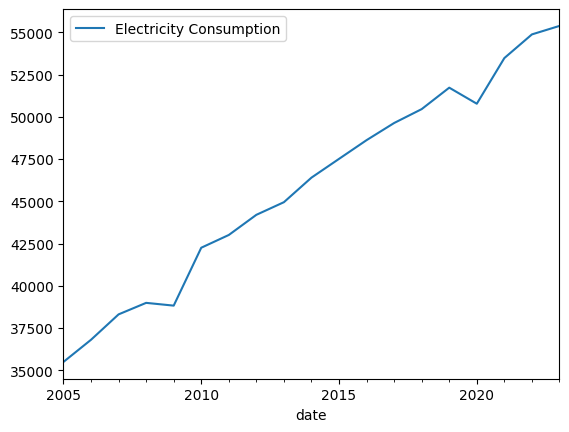

In [24]:
electricity_annual_calc.plot(x = "date", y = "Electricity Consumption")

## Seems like a rather linear trend

### Let's investigate the relationship between electricity consumption and GDP.

In [38]:
GDP_annual = pd.read_csv('./datasets/KeyDataOfGrossDomesticProductInChained2015DollarsByIndustrySSIC2020Annual.csv')

In [39]:
#same old same old
GDP_annual = GDP_annual.T
GDP_annual.columns = GDP_annual.iloc[0]
GDP_annual = GDP_annual[1:]

In [36]:
GDP_annual.head()

DataSeries,GDP In Chained (2015) Dollars,Goods Producing Industries,Manufacturing,Construction,Services Producing Industries,Wholesale & Retail Trade And Transportation & Storage,"Information & Communications, Finance & Insurance And Professional Services","Accommodation & Food Services, Real Estate, Administrative & Support Services And Other Services Industries"
2024,561941.4,143293.2,115566.6,19906.5,365952.6,120093.4,146421.7,100519.2
2023,538319.8,137537.1,110841.6,19053.9,350528.9,114351.5,139219.9,98418.2
2022,528690.2,141312.3,115737.6,18003.0,339355.2,112262.6,132581.1,94627.3
2021,507828.6,136006.3,112695.1,15894.6,322827.1,107665.1,126666.6,88166.3
2020,462685.3,117763.0,99463.0,11264.5,298317.0,97641.3,116174.0,84593.9


In [40]:
#you know the drill
GDP_annual['date'] = GDP_annual.index
GDP_annual = GDP_annual.reset_index(drop=True)

In [33]:
GDP_annual.head()

DataSeries,GDP In Chained (2015) Dollars,Goods Producing Industries,Manufacturing,Construction,Services Producing Industries,Wholesale & Retail Trade And Transportation & Storage,"Information & Communications, Finance & Insurance And Professional Services","Accommodation & Food Services, Real Estate, Administrative & Support Services And Other Services Industries",date
0,561941.4,143293.2,115566.6,19906.5,365952.6,120093.4,146421.7,100519.2,2024
1,538319.8,137537.1,110841.6,19053.9,350528.9,114351.5,139219.9,98418.2,2023
2,528690.2,141312.3,115737.6,18003.0,339355.2,112262.6,132581.1,94627.3,2022
3,507828.6,136006.3,112695.1,15894.6,322827.1,107665.1,126666.6,88166.3,2021
4,462685.3,117763.0,99463.0,11264.5,298317.0,97641.3,116174.0,84593.9,2020


In [41]:
#drop column that i do not need and then melt to turn all columns into single var & value pair. this will make it easier for dashboarding and any modeling
GDP_sectors = GDP_annual.drop(columns= ['GDP In Chained (2015) Dollars']).melt(id_vars=['date'],var_name='Industry', value_name='GDP')

In [ ]:
#export to csv
GDP_sectors.to_csv('gdp_by_sector.csv')

In [43]:
#now lets look at GDP
GDP_annual_overall = GDP_annual[["date", "GDP In Chained (2015) Dollars"]]

In [44]:
GDP_annual_overall.head()

DataSeries,date,GDP In Chained (2015) Dollars
0,2024,561941.4
1,2023,538319.8
2,2022,528690.2
3,2021,507828.6
4,2020,462685.3


In [45]:
GDP_annual_overall["date"] = pd.to_datetime(GDP_annual_overall["date"], format="%Y")

C:\Users\User\AppData\Local\Temp\ipykernel_1052\2529585411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP_annual_overall["date"] = pd.to_datetime(GDP_annual_overall["date"], format="%Y")


In [46]:
#merge with one of the tables earlier for view of both consumption, generation, and GDP
electricity_annual_calc = pd.merge(electricity_annual_calc, GDP_annual_overall, on = "date", how = "left")

In [47]:
electricity_annual_calc.head()

DataSeries,date,Electricity Generation,Electricity Consumption,cons_gen_ratio,GDP In Chained (2015) Dollars
0,2023-01-01,57384.2,55386.9,0.965194,538319.8
1,2022-01-01,57113.7,54884.9,0.960976,528690.2
2,2021-01-01,55788.3,53483.3,0.958683,507828.6
3,2020-01-01,53071.6,50779.5,0.956811,462685.3
4,2019-01-01,54142.3,51730.1,0.955447,481035.4


In [48]:
#new look at consumption to gdp ratio to see if there is any trend
electricity_annual_calc["cons_gdp_ratio"] = electricity_annual_calc["Electricity Consumption"]/electricity_annual_calc["GDP In Chained (2015) Dollars"]

<Axes: xlabel='date'>

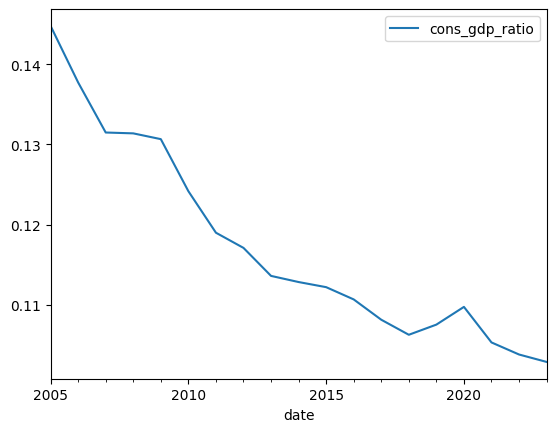

In [49]:
electricity_annual_calc.plot(x = "date", y = "cons_gdp_ratio")

### seems like consumption increase at a slower rate compared to GDP. This is likely due to new emerging markets being less electricity intensive compared to more tradition sectors like manufacturing

### Let's impute the missing 2024 electricity consumption data to be the 2023 cons_gen_ratio * 2024 electricity generation

In [57]:
#but first lets convert data type
electricity_annual_overall["Electricity Consumption"] = pd.to_numeric(electricity_annual_overall["Electricity Consumption"])
electricity_annual_overall["Electricity Generation"] = pd.to_numeric(electricity_annual_overall["Electricity Generation"])
electricity_annual_overall["date"] = pd.to_datetime(electricity_annual_overall["date"], format = '%Y')
electricity_annual_overall.head()

DataSeries,date,Electricity Generation,Electricity Consumption
0,2024-01-01,59616.1,57541.1
1,2023-01-01,57384.2,55386.9
2,2022-01-01,57113.7,54884.9
3,2021-01-01,55788.3,53483.3
4,2020-01-01,53071.6,50779.5


In [58]:
electricity_annual_overall = electricity_annual_overall[electricity_annual_overall["date"] >= '2005']
electricity_annual_calc["cons_gen_ratio"][electricity_annual_calc["date"] == '2023'].values[0]

0.9651942520763556

In [59]:
#imputed 2024 consumption data by multiplying 2024 consumption with 2023 cons_gen_ratio
electricity_annual_overall["Electricity Consumption"][(electricity_annual_overall["Electricity Consumption"] == 'na')] = electricity_annual_calc["cons_gen_ratio"][electricity_annual_calc["date"] == '2023'].values[0] * 59616.1

C:\Users\User\AppData\Local\Temp\ipykernel_1052\117169464.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  electricity_annual_overall["Electricity Consumption"][(electricity_annual_overall["Electricity Consumption"] == 'na')] = electricit

In [60]:
#rename some columns
electricity_annual_overall.rename(columns= {"Electricity Consumption" : "electricity_consumption_GWh", "Electricity Generation" : "electricity_generation_GWh"}, inplace=True)
electricity_annual_overall.head()

DataSeries,date,electricity_generation_GWh,electricity_consumption_GWh
0,2024-01-01,59616.1,57541.1
1,2023-01-01,57384.2,55386.9
2,2022-01-01,57113.7,54884.9
3,2021-01-01,55788.3,53483.3
4,2020-01-01,53071.6,50779.5


In [62]:
#merged with GDP data
electricity_annual_overall = pd.merge(electricity_annual_overall, GDP_annual_overall, on = "date", how = "left")
electricity_annual_overall.head()

DataSeries,date,electricity_generation_GWh,electricity_consumption_GWh,Year,GDP In Chained (2015) Dollars
0,2024-01-01,59616.1,57541.1,2024,561941.4
1,2023-01-01,57384.2,55386.9,2023,538319.8
2,2022-01-01,57113.7,54884.9,2022,528690.2
3,2021-01-01,55788.3,53483.3,2021,507828.6
4,2020-01-01,53071.6,50779.5,2020,462685.3


In [63]:
#rename column to be consistent
electricity_annual_overall.rename(columns = {"GDP In Chained (2015) Dollars" : "gdp_thousands_usd"}, inplace=True)

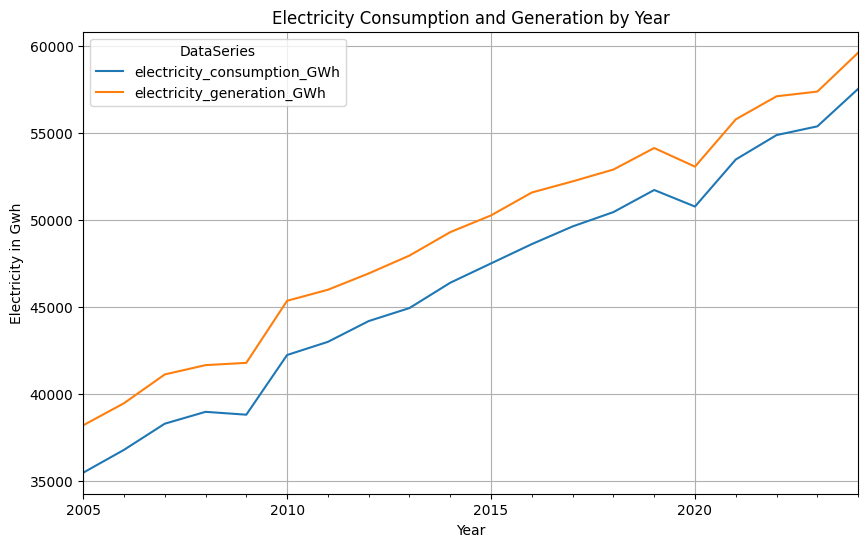

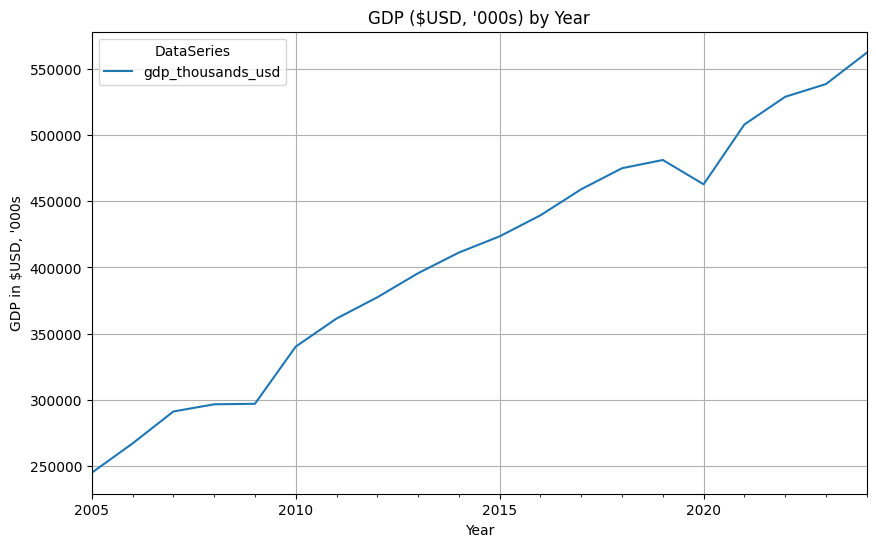

In [ ]:
#taking a look at some of the relationships
electricity_annual_overall.plot(kind='line', x = 'date', y = ['electricity_consumption_GWh', 'electricity_generation_GWh'], figsize=(10,6))
plt.title("Electricity Consumption and Generation by Year")
plt.ylabel("Electricity in Gwh")
plt.xlabel("Year")
plt.grid(True)
electricity_annual_overall.plot(kind='line', x = 'date', y = ['gdp_thousands_usd'], figsize=(10,6))
plt.title("GDP ($USD, '000s) by Year")
plt.ylabel("GDP in $USD, '000s")
plt.xlabel("Year")
plt.grid(True)

In [64]:
#set date as index while leaving a year column
electricity_annual_overall["Year"] = electricity_annual_overall["date"].dt.year
electricity_annual_overall = electricity_annual_overall.set_index("date")
electricity_annual_overall.head()

DataSeries,electricity_generation_GWh,electricity_consumption_GWh,Year,gdp_thousands_usd
date,,,,
2024-01-01,59616.1,57541.1,2024,561941.4
2023-01-01,57384.2,55386.9,2023,538319.8
2022-01-01,57113.7,54884.9,2022,528690.2
2021-01-01,55788.3,53483.3,2021,507828.6
2020-01-01,53071.6,50779.5,2020,462685.3


In [ ]:
#port to csv for further EDA in powerBI
electricity_annual_overall.to_csv('electricity_annual.csv')

In [67]:
GDP_annual = GDP_annual.drop(columns= ['GDP In Chained (2015) Dollars'])
GDP_annual = GDP_annual[GDP_annual["date"] >= '2005']
GDP_annual_melt = GDP_annual.melt(id_vars='date', var_name='Sector', value_name='GDP').sort_values(by='date',ascending=False)
GDP_annual_melt.reset_index(drop=True)

,date,Sector,GDP
0,2024,Goods Producing Industries,143293.2
1,2024,Services Producing Industries,365952.6
2,2024,"Information & Communications, Finance & Insura...",146421.7
3,2024,Construction,19906.5
4,2024,Wholesale & Retail Trade And Transportation & ...,120093.4
...,...,...,...
135,2005,Construction,7081.9
136,2005,"Information & Communications, Finance & Insura...",44207.4
137,2005,Wholesale & Retail Trade And Transportation & ...,57459.0
138,2005,Manufacturing,50641.2


In [68]:
GDP_annual_melt.rename(columns={'date':'Year'},inplace=True)

In [69]:
GDP_annual_melt["GDP"] = GDP_annual_melt["GDP"].astype(float)
GDP_annual_melt['Year'] = GDP_annual_melt['Year'].astype(int)
GDP_annual_melt

,Year,Sector,GDP
0,2024,Goods Producing Industries,143293.2
60,2024,Services Producing Industries,365952.6
100,2024,"Information & Communications, Finance & Insura...",146421.7
40,2024,Construction,19906.5
80,2024,Wholesale & Retail Trade And Transportation & ...,120093.4
...,...,...,...
59,2005,Construction,7081.9
119,2005,"Information & Communications, Finance & Insura...",44207.4
99,2005,Wholesale & Retail Trade And Transportation & ...,57459.0
39,2005,Manufacturing,50641.2


In [70]:
electricity_annual.rename(columns={"date":"Year"}, inplace=True)
electricity_annual = electricity_annual[(electricity_annual["Year"] >= '2005') & (electricity_annual["Year"] < '2024')]

In [74]:
#convert some data types
electricity_annual["Year"] = electricity_annual["Year"].astype(int)
tofloat = electricity_annual.columns.difference(['Year'])
electricity_annual[tofloat] = electricity_annual[tofloat].astype(float)

In [ ]:
#doublecheck that it is all float now
electricity_annual.dtypes

DataSeries
Electricity Generation                                                       float64
Electricity Consumption                                                      float64
Industrial-Related                                                           float64
Manufacturing                                                                float64
Construction                                                                 float64
Utilities                                                                    float64
Other Industrial-Related                                                     float64
Commerce And Service-Related                                                 float64
Wholesale And Retail Trade                                                   float64
Accommodation And Food Services                                              float64
Information And Communications                                               float64
Financial And Insurance Activities                    

In [77]:
#only interested in the 4 columns for future analysis

electricity_annual = electricity_annual[["Year", "Manufacturing", "Commerce And Service-Related", "Transport-Related", "Households"]]

In [78]:
electricity_annual_melt = electricity_annual.melt(id_vars='Year', var_name='Sector', value_name='consumption_GWh').sort_values(by='Year',ascending=False)

In [79]:
electricity_annual_melt.reset_index(drop=True)

,Year,Sector,consumption_GWh
0,2023,Manufacturing,20171.2
1,2023,Households,8002.9
2,2023,Transport-Related,3030.2
3,2023,Commerce And Service-Related,22092.7
4,2022,Transport-Related,2899.7
...,...,...,...
71,2006,Commerce And Service-Related,13785.7
72,2005,Commerce And Service-Related,13075.6
73,2005,Manufacturing,13836.1
74,2005,Transport-Related,1200.0


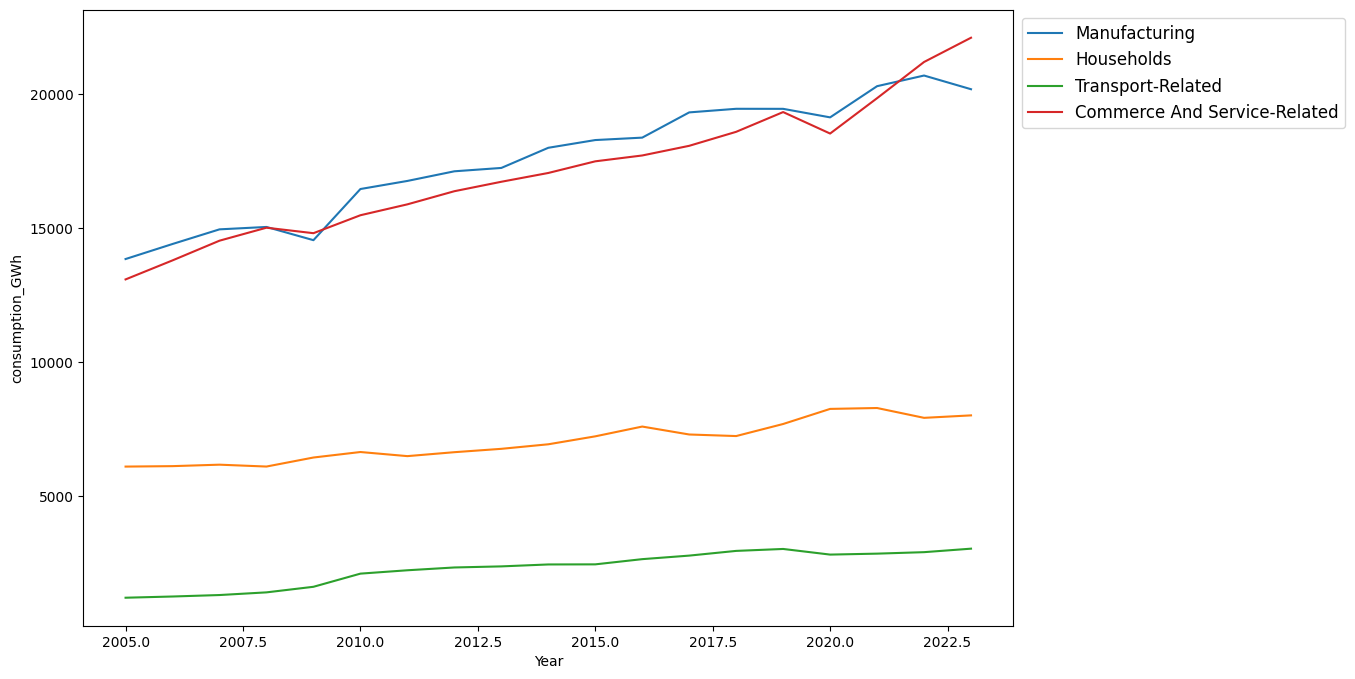

In [80]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=electricity_annual_melt, x='Year', y='consumption_GWh', hue='Sector')
plt.legend(
    loc='upper left',            
    bbox_to_anchor=(1, 1),         
    fontsize=12
)
plt.show()

In [81]:
#creating a new df where it is just the sectors of interest.
electricity_annual_melt_copy = electricity_annual_melt.copy()

electricity_annual_melt_copy['Sector'] = electricity_annual_melt_copy['Sector'].replace({'Commerce And Service-Related': 'Services Producing Industries', 'Transport-Related': 'Services Producing Industries'})

electricity_annual_melt_combined = electricity_annual_melt_copy.groupby(['Year', 'Sector'], as_index=False)['consumption_GWh'].sum()

print(electricity_annual_melt_combined)

    Year                         Sector  consumption_GWh
0   2005                     Households           6092.5
1   2005                  Manufacturing          13836.1
2   2005  Services Producing Industries          14275.6
3   2006                     Households           6109.1
4   2006                  Manufacturing          14397.2
5   2006  Services Producing Industries          15031.1
6   2007                     Households           6163.7
7   2007                  Manufacturing          14943.2
8   2007  Services Producing Industries          15820.8
9   2008                     Households           6094.0
10  2008                  Manufacturing          15032.7
11  2008  Services Producing Industries          16404.4
12  2009                     Households           6430.8
13  2009                  Manufacturing          14539.7
14  2009  Services Producing Industries          16407.9
15  2010                     Households           6636.0
16  2010                  Manuf

In [82]:
#looked good so now make it the actual data
electricity_annual_melt = electricity_annual_melt_combined

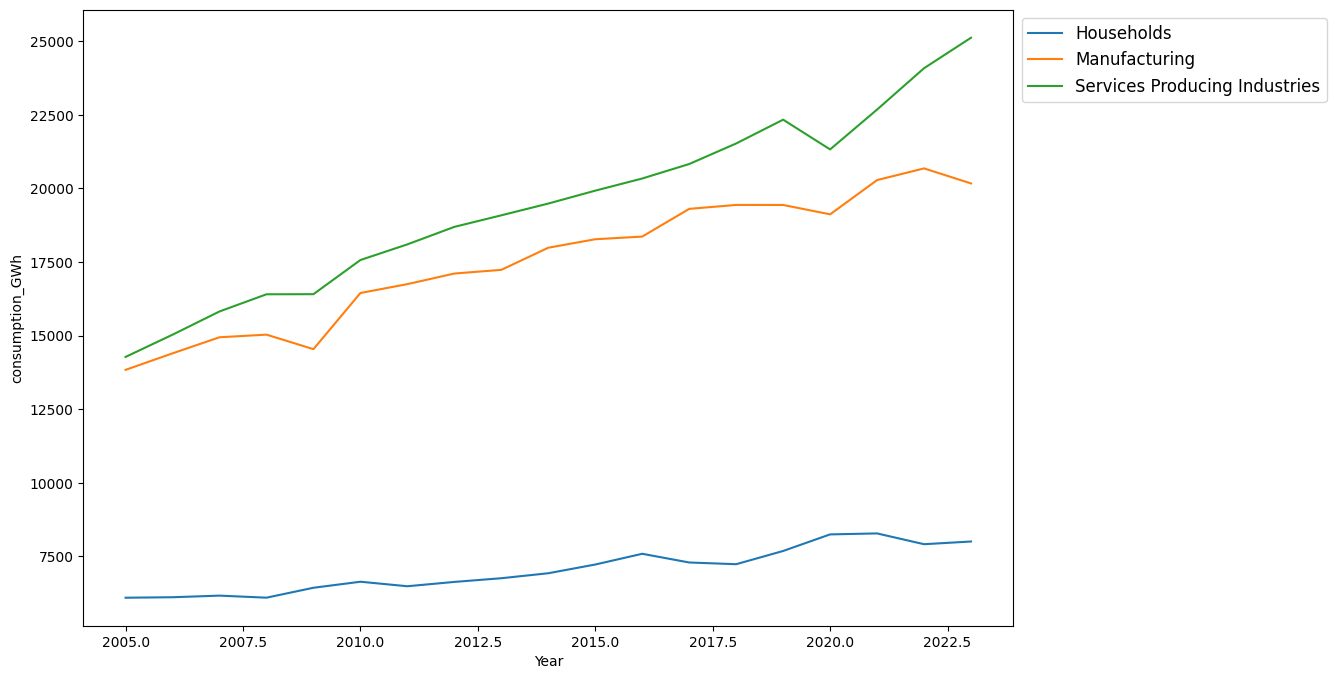

In [83]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=electricity_annual_melt, x='Year', y='consumption_GWh', hue='Sector')
plt.legend(
    loc='upper left',            
    bbox_to_anchor=(1, 1),         
    fontsize=12
)
plt.show()

In [85]:
electricity_gdp_combined = pd.merge(left = electricity_annual_melt, right = GDP_annual_melt, how = 'left', on = ['Year', 'Sector'])

In [86]:
electricity_gdp_combined = electricity_gdp_combined.dropna()

In [87]:
electricity_gdp_combined["gdp_cons_ratio"] = electricity_gdp_combined["GDP"]/electricity_gdp_combined["consumption_GWh"]

In [89]:
electricity_gdp_combined.head()

,Year,Sector,consumption_GWh,GDP,gdp_cons_ratio
1,2005,Manufacturing,13836.1,50641.2,3.660078
2,2005,Services Producing Industries,14275.6,152934.3,10.712986
4,2006,Manufacturing,14397.2,56678.6,3.936779
5,2006,Services Producing Industries,15031.1,165545.0,11.013499
7,2007,Manufacturing,14943.2,60045.8,4.018269


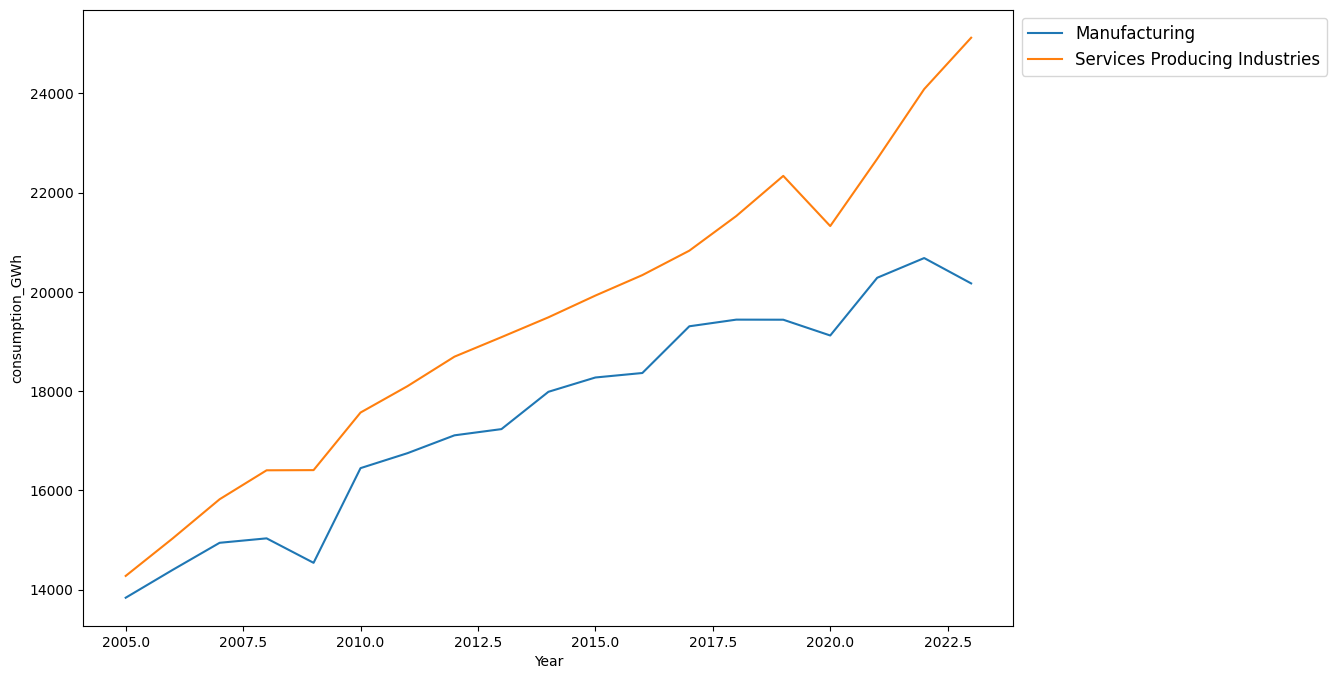

In [90]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=electricity_gdp_combined, x='Year', y='consumption_GWh', hue='Sector')
plt.legend(
    loc='upper left',            
    bbox_to_anchor=(1, 1),         
    fontsize=12
)
plt.show()

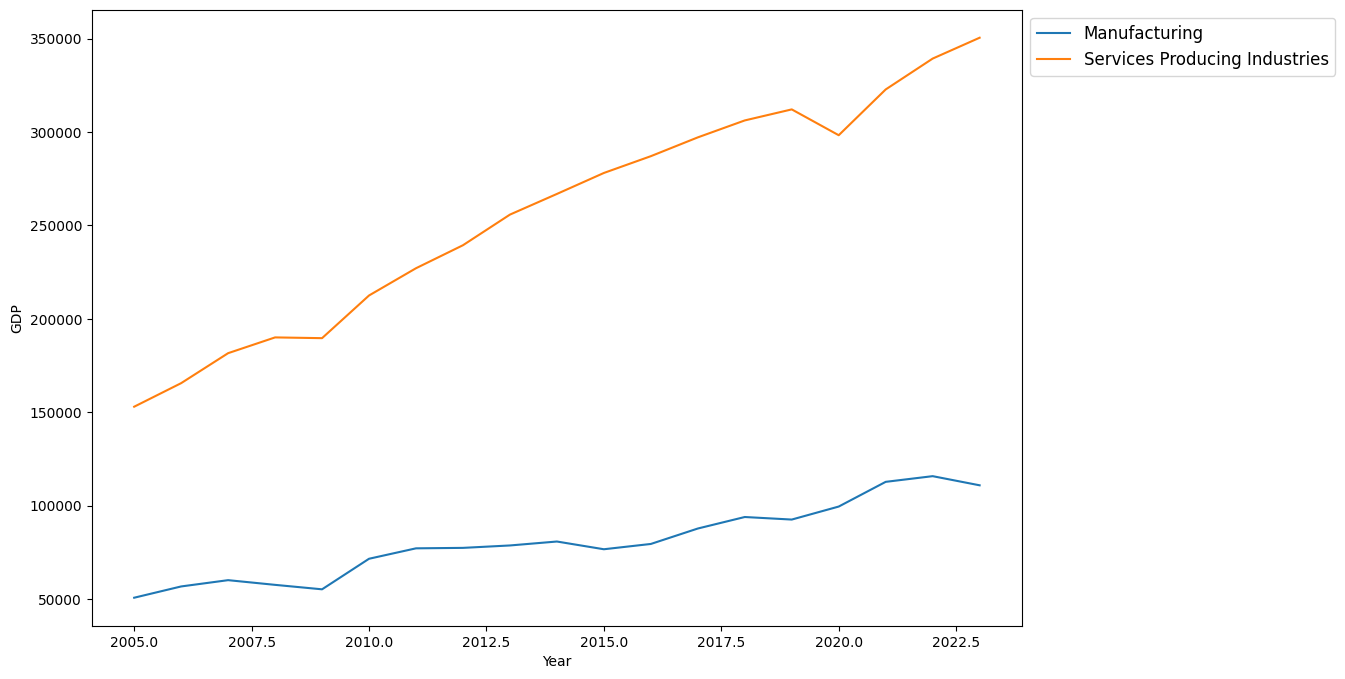

In [91]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=electricity_gdp_combined, x='Year', y='GDP', hue='Sector')
plt.legend(
    loc='upper left',            
    bbox_to_anchor=(1, 1),         
    fontsize=12
)
plt.show()

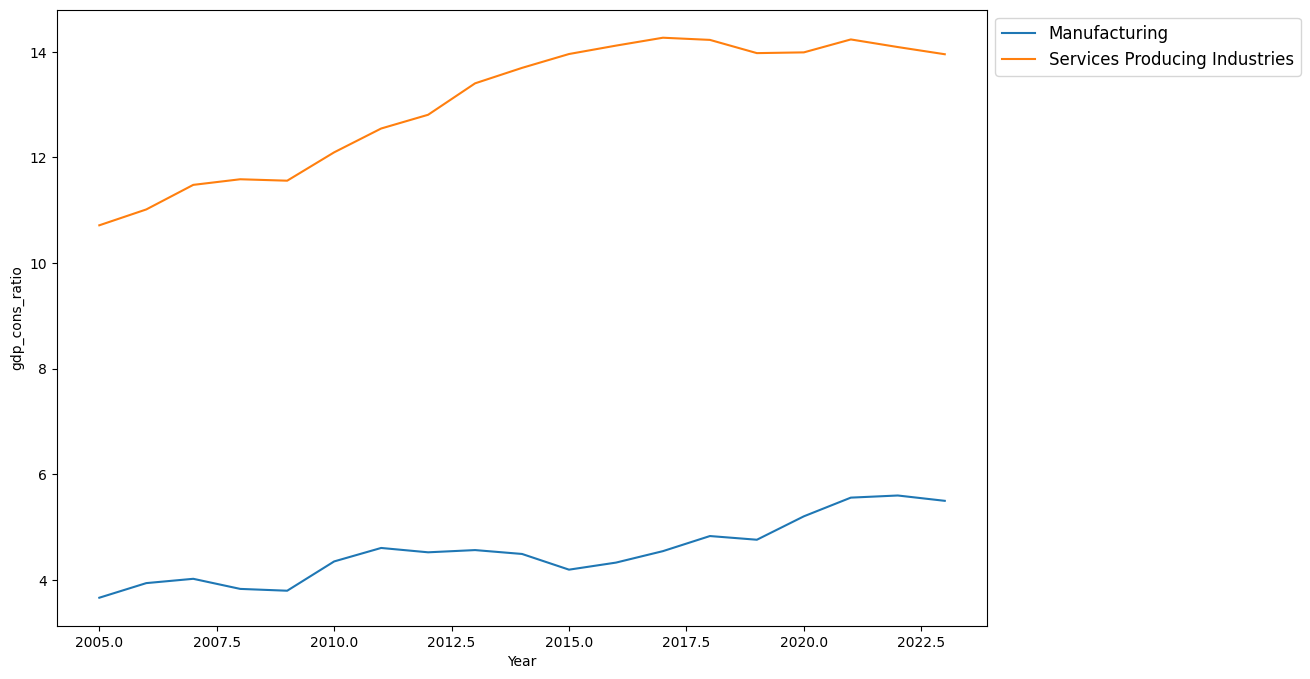

In [92]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=electricity_gdp_combined, x='Year', y='gdp_cons_ratio', hue='Sector')
plt.legend(
    loc='upper left',            
    bbox_to_anchor=(1, 1),         
    fontsize=12
)
plt.show()

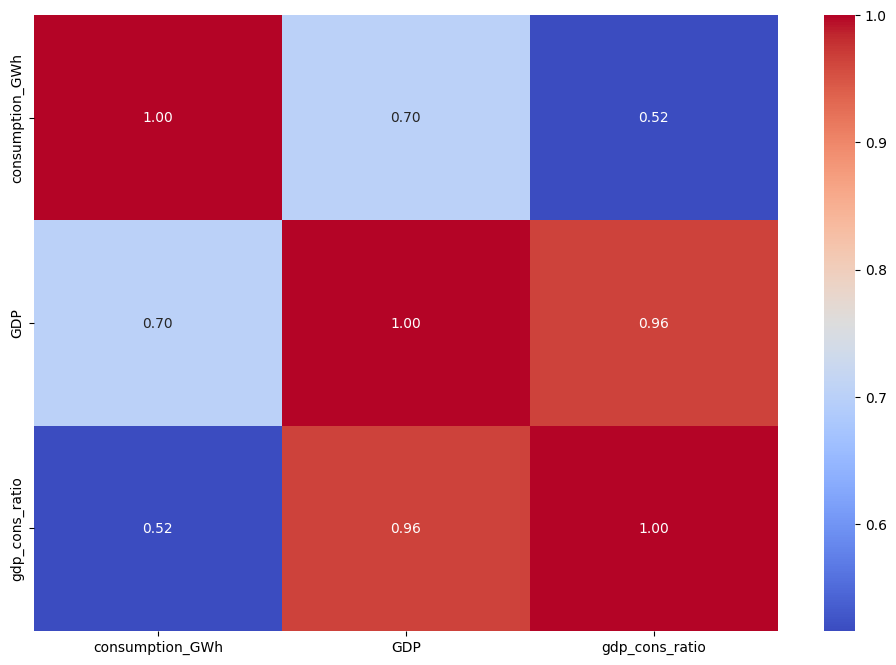

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(electricity_gdp_combined.drop(columns=['Year']).corr(numeric_only=True), fmt='.2f', cmap='coolwarm', annot=True)
plt.show()